In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.spatial import distance


In [5]:
df = pd.read_excel("clara.xlsx")

In [9]:
df.columns

Index(['Unnamed: 0', 'V1', 'V2'], dtype='object')

In [14]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
df.sample(3)

,V1,V2
2174,74.95858,-4.134062
1510,34.24286,62.928880
782,13.22721,7.873434


In [16]:
df.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [18]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

Text(0, 0.5, 'V2')

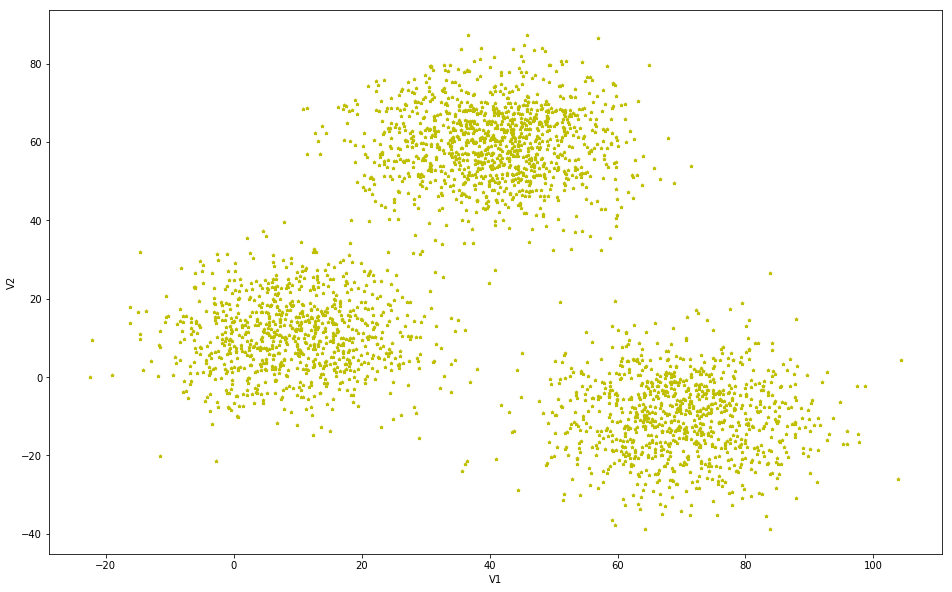

In [41]:
plt.figure(figsize = (16,10))
plt.scatter(df['V1'],df['V2'], s=10, c='y', marker="*")
plt.xlabel('V1')
plt.ylabel('V2')

In [51]:
def generateRandomPoint(ax):
    if ax == 'x':
        return random.uniform(df['V1'].min(),df['V1'].max())
    else:
        return random.uniform(df['V2'].min(),df['V2'].max())

print(generateRandomPoint('x'))
print(generateRandomPoint('y'))

39.39200509330799
-18.83284601970285


In [61]:
k = 3
c_x = []
c_y = []


for i in range(k):
    c_x.append(generateRandomPoint('x'))
    c_y.append(generateRandomPoint('y'))

Text(0, 0.5, 'V2')

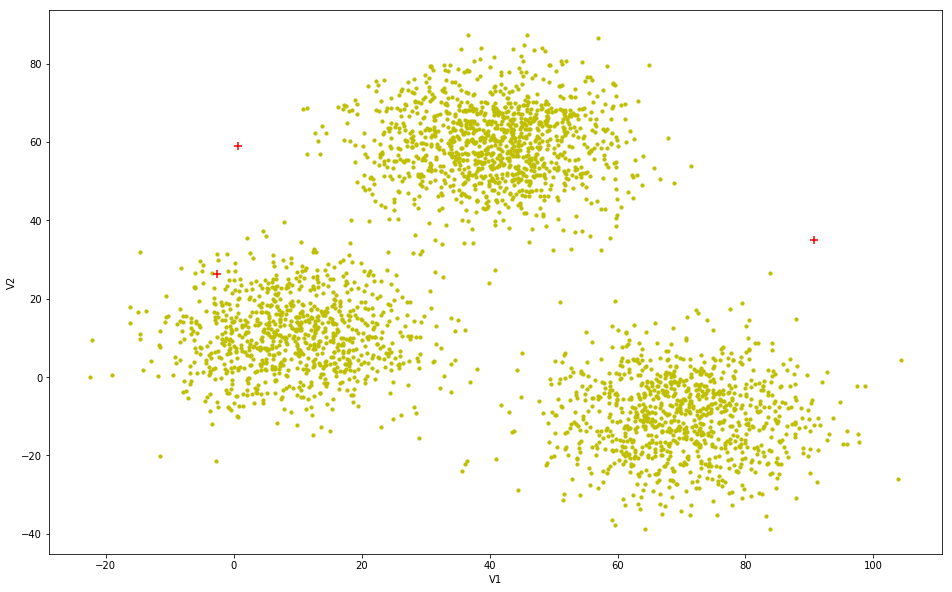

In [62]:
plt.figure(figsize = (16,10))
plt.scatter(df['V1'],df['V2'], s=10, c='y')
plt.scatter(c_x,c_y, marker="+", c='r', s=50)
plt.xlabel('V1')
plt.ylabel('V2')

In [64]:
c = np.array(list(zip(c_x,c_y)))
cluster = np.zeros(len(df))
temp = df.values

In [91]:
for j in range(len(df)):
    dist = []
    for i in range(len(c)):
        dist.append(distance.euclidean(temp[j],c[i]))
    cluster[j] = np.argmin(dist)

Text(0, 0.5, 'V2')

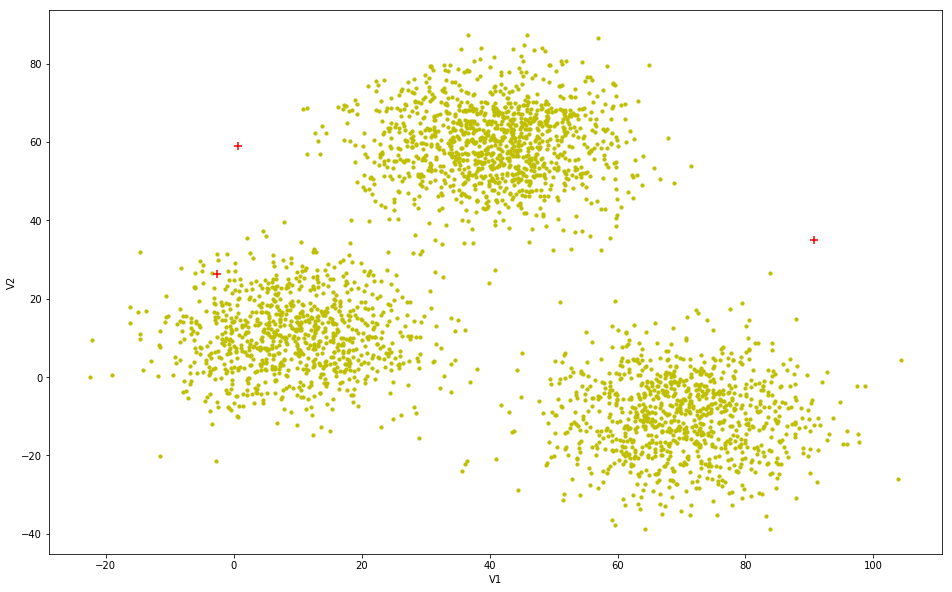

Text(0, 0.5, 'V2')

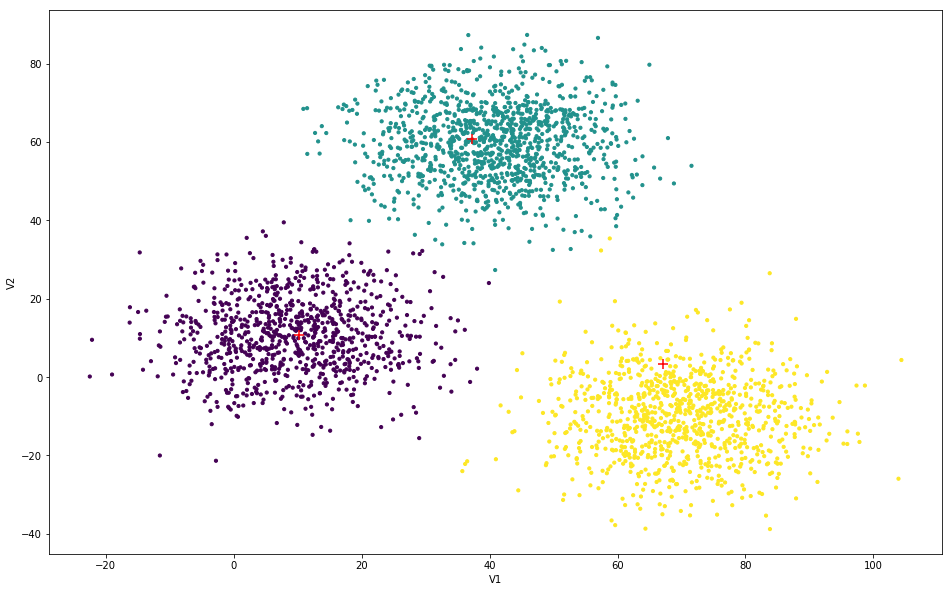

In [92]:
df['cluster']=cluster
plt.figure(figsize = (16,10))
plt.scatter(df['V1'],df['V2'], s=10, c=df['cluster'])
plt.scatter(c_x,c_y, marker="+", c='r', s=100)
plt.xlabel('V1')
plt.ylabel('V2')

In [84]:
for i in range(k):
    points = []
    for j in range(len(temp)):
        if cluster[j] == i:
            points.append(temp[j])
    c[i] = np.mean(points, axis=0)

Text(0, 0.5, 'V2')

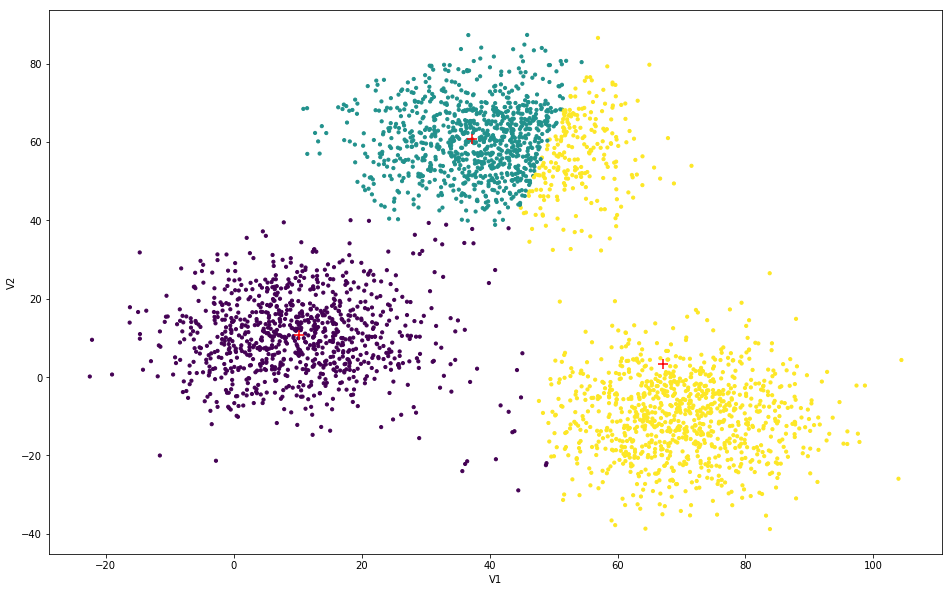

In [90]:
c_x = np.transpose(c)[0]
c_y = np.transpose(c)[1]
plt.figure(figsize = (16,10))
plt.scatter(df['V1'],df['V2'], s=10, c=df['cluster'])
plt.scatter(c_x,c_y, marker="+", c='r', s=100)
plt.xlabel('V1')
plt.ylabel('V2')